# Introducción

Para el reto de averiguar los casos de dengue en el amazonas, el cuál ante todo nos hemos dado cuenta que es un problema de regresión, tenemos las siguientes variables : 

City: la ciudad donde se han registrado los casos de dengue en este caso San Juan y Iquitos.

Year: el año en el que se registraron los casos de dengue.

Weekofyear: la semana del año en la que se registraron los casos de dengue.

Week_start_date: la fecha de inicio de la semana en la que se registraron los casos de dengue.

Ndvi_ne: el índice de vegetación de diferencia normalizada para la región noreste.

Ndvi_nw: el índice de vegetación de diferencia normalizada para la región noroeste.

Ndvi_se: el índice de vegetación de diferencia normalizada para la región sureste.

Ndvi_sw: el índice de vegetación de diferencia normalizada para la región suroeste.

Precipitation_amt_mm: la cantidad de precipitación en milímetros.

Reanalysis_air_temp_k: la temperatura del aire según la reanálisis.

Reanalysis_avg_temp_k: la temperatura media según la reanálisis.

Reanalysis_dew_point_temp_k: la temperatura de punto de rocío según la reanálisis.

Reanalysis_max_air_temp_k: la temperatura máxima del aire según la reanálisis.

Reanalysis_min_air_temp_k: la temperatura mínima del aire según la reanálisis.

Reanalysis_precip_amt_kg_per_m2: la cantidad de precipitación en kilogramos por metro cuadrado según la reanálisis.

Reanalysis_relative_humidity_percent: la humedad relativa según la reanálisis.

Reanalysis_sat_precip_amt_mm: la cantidad de precipitación en milímetros según la reanálisis.

Reanalysis_specific_humidity_g_per_kg: la humedad específica según la reanálisis.

Reanalysis_tdtr_k: la amplitud diaria de la temperatura según la reanálisis.

Station_avg_temp_c: la temperatura promedio en grados Celsius según la estación meteorológica.

Station_diur_temp_rng_c: la variación diurna de la temperatura en grados Celsius según la estación meteorológica.

Station_max_temp_c: la temperatura máxima en grados Celsius según la estación meteorológica.

Station_min_temp_c: la temperatura mínima en grados Celsius según la estación meteorológica.

Station_precip_mm: la cantidad de precipitación en milímetros según la estación meteorológica.

# Lectura de ficheros train,test y label

Leo todos los ficheros desde el repositorio de github que he creado para ésta actividad dónde también se encuentra el código

In [1]:
# carga de datos
import io
from google.colab import files
import pandas as pd
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from google.colab import drive

def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')),sep=",")
    return df

 # subimos el fichero
#asignamos el csv a la variable
x_train = pd.read_csv('https://raw.githubusercontent.com/alexander6779/SNS/main/challenge_dengue/dengue_features_train.csv')

In [2]:
y_train = pd.read_csv('https://raw.githubusercontent.com/alexander6779/SNS/main/challenge_dengue/dengue_labels_train.csv')

In [3]:
X_test =pd.read_csv('https://raw.githubusercontent.com/alexander6779/SNS/main/challenge_dengue/dengue_features_test.csv')

# Obtención de csv completo y limpio

1. Rellenar valores nulos usando el siguiente método que se encarga de generar un valor nuevo a partir de la media de los últimos 20.

In [4]:
x_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

2. Cambiar datos de categóricos a numéricos y ver que casi todos los datos son de tipo float64 o int64.

In [5]:
x_train['city'].replace(['sj','iq'], [0,1], inplace = True)
X_test['city'].replace(['sj','iq'],[0,1],inplace=True)
x_train['week_start_date'] = x_train['week_start_date'].str.replace('-','')
x_train['week_start_date'] = pd.to_numeric(x_train['week_start_date'], errors='coerce')
X_test['week_start_date'] = X_test['week_start_date'].str.replace('-',' ')
X_test['week_start_date'] = pd.to_numeric(X_test['week_start_date'], errors='coerce')
x_train.dtypes

city                                       int64
year                                       int64
weekofyear                                 int64
week_start_date                            int64
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

3. Vemos la media, mediana, desviación estándar...

In [6]:
x_train.describe()

city         year   weekofyear  week_start_date      ndvi_ne  \
count  1456.000000  1456.000000  1456.000000     1.456000e+03  1456.000000   
mean      0.357143  2001.031593    26.503434     2.001097e+07     0.123334   
std       0.479322     5.408314    15.019437     5.405874e+04     0.139484   
min       0.000000  1990.000000     1.000000     1.990043e+07    -0.406250   
25%       0.000000  1997.000000    13.750000     1.997043e+07     0.000000   
50%       0.000000  2002.000000    26.500000     2.002053e+07     0.104114   
75%       1.000000  2005.000000    39.250000     2.005113e+07     0.229292   
max       1.000000  2010.000000    53.000000     2.010062e+07     0.508357   

           ndvi_nw      ndvi_se      ndvi_sw  precipitation_amt_mm  \
count  1456.000000  1456.000000  1456.000000           1456.000000   
mean      0.125890     0.200704     0.199249             45.351813   
std       0.120302     0.077403     0.086849             43.732321   
min      -0.456100    -0.015533    -0.063457              0.000000   
25%       0.040175     0.152580     0.141007              9.115000   
50%       0.114633     0.195207     0.187464             37.660000   
75%       0.212325     0.247021     0.246082             70.047500   
max       0.454429     0.538314     0.546017            390.600000   

       reanalysis_air_temp_k  ...  reanalysis_precip_amt_kg_per_m2  \
count            1456.000000  ...                      1456.000000   
mean              296.650329  ...                        39.876051   
std                24.715317  ...                        43.411809   
min                 0.000000  ...                         0.000000   
25%               297.640000  ...                        12.800000   
50%               298.627857  ...                        27.080000   
75%               299.827500  ...                        52.042500   
max               302.200000  ...                       570.500000   

       reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
count                           1456.000000                   1456.000000   
mean                              81.597660                     45.351813   
std                                9.843965                     43.732321   
min                                0.000000                      0.000000   
25%                               77.090357                      9.115000   
50%                               80.255714                     37.660000   
75%                               86.041429                     70.047500   
max                               98.610000                    390.600000   

       reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
count                            1456.000000        1456.000000   
mean                               16.631410           4.870075   
std                                 2.068125           3.557382   
min                                 0.000000           0.000000   
25%                                15.511429           2.325000   
50%                                17.065000           2.835714   
75%                                17.974643           7.553571   
max                                20.461429          16.028571   

       station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
count         1456.000000              1456.000000         1456.000000   
mean            26.382907                 7.821312           32.006662   
std              4.776776                 2.501954            4.250146   
min              0.000000                 0.000000            0.000000   
25%             26.200000                 6.439286           31.100000   
50%             27.385714                 7.242857           32.800000   
75%             28.128571                 9.500000           33.900000   
max             30.800000                15.800000           42.200000   

       station_min_temp_c  station_precip_mm  
count         1456.000000        1456

4. Pequeña representación de como se queda x_train para después ver la correlación.

In [7]:
x_train

city  year  weekofyear  week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0        0  1990          18         19900430  0.122600  0.103725  0.198483   
1        0  1990          19         19900507  0.169900  0.142175  0.162357   
2        0  1990          20         19900514  0.032250  0.172967  0.157200   
3        0  1990          21         19900521  0.128633  0.245067  0.227557   
4        0  1990          22         19900528  0.196200  0.262200  0.251200   
...    ...   ...         ...              ...       ...       ...       ...   
1451     1  2010          21         20100528  0.342750  0.318900  0.256343   
1452     1  2010          22         20100604  0.160157  0.160371  0.136043   
1453     1  2010          23         20100611  0.247057  0.146057  0.250357   
1454     1  2010          24         20100618  0.333914  0.245771  0.278886   
1455     1  2010          25         20100625  0.298186  0.232971  0.274214   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0     0.177617                 12.42             297.572857  ...   
1     0.155486                 22.82             298.211429  ...   
2     0.170843                 34.54             298.781429  ...   
3     0.235886                 15.36             298.987143  ...   
4     0.247340                  7.52             299.518571  ...   
...        ...                   ...                    ...  ...   
1451  0.292514                 55.30             299.334286  ...   
1452  0.225657                 86.47             298.330000  ...   
1453  0.233714                 58.94             296.598571  ...   
1454  0.325486                 59.67             296.345714  ...   
1455  0.315757                 63.22             298.097143  ...   

      reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                               32.00                             73.365714   
1                               17.94                             77.368571   
2                               26.10                             82.052857   
3                               13.90                             80.337143   
4                               12.20                             80.460000   
...                               ...                                   ...   
1451                            45.00                             88.765714   
1452                           207.10                             91.600000   
1453                            50.60                             94.280000   
1454                            62.33                             94.660000   
1455                            36.90                             89.082857   

      reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                            12.42                              14.012857   
1                            22.82                              15.372857   
2                            34.54                              16.848571   
3                            15.36                              16.672857   
4                             7.52                              17.210000   
...                            ...                                    ...   
1451                         55.30                              18.485714   
1452                         86.47                              18.070000   
1453                         58.94                              17.008571   
1454                         59.67                              16.815714   
1455                         63.22                              17.355714   

      reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0              2.628571           25.442857                 6.900000   
1              2.371429           26.714286                 6.371429   
2              2.300000           26.714286                 6.485714   
3              2.428571           27.471429                 6.771429   
4     

# Matriz de correlación

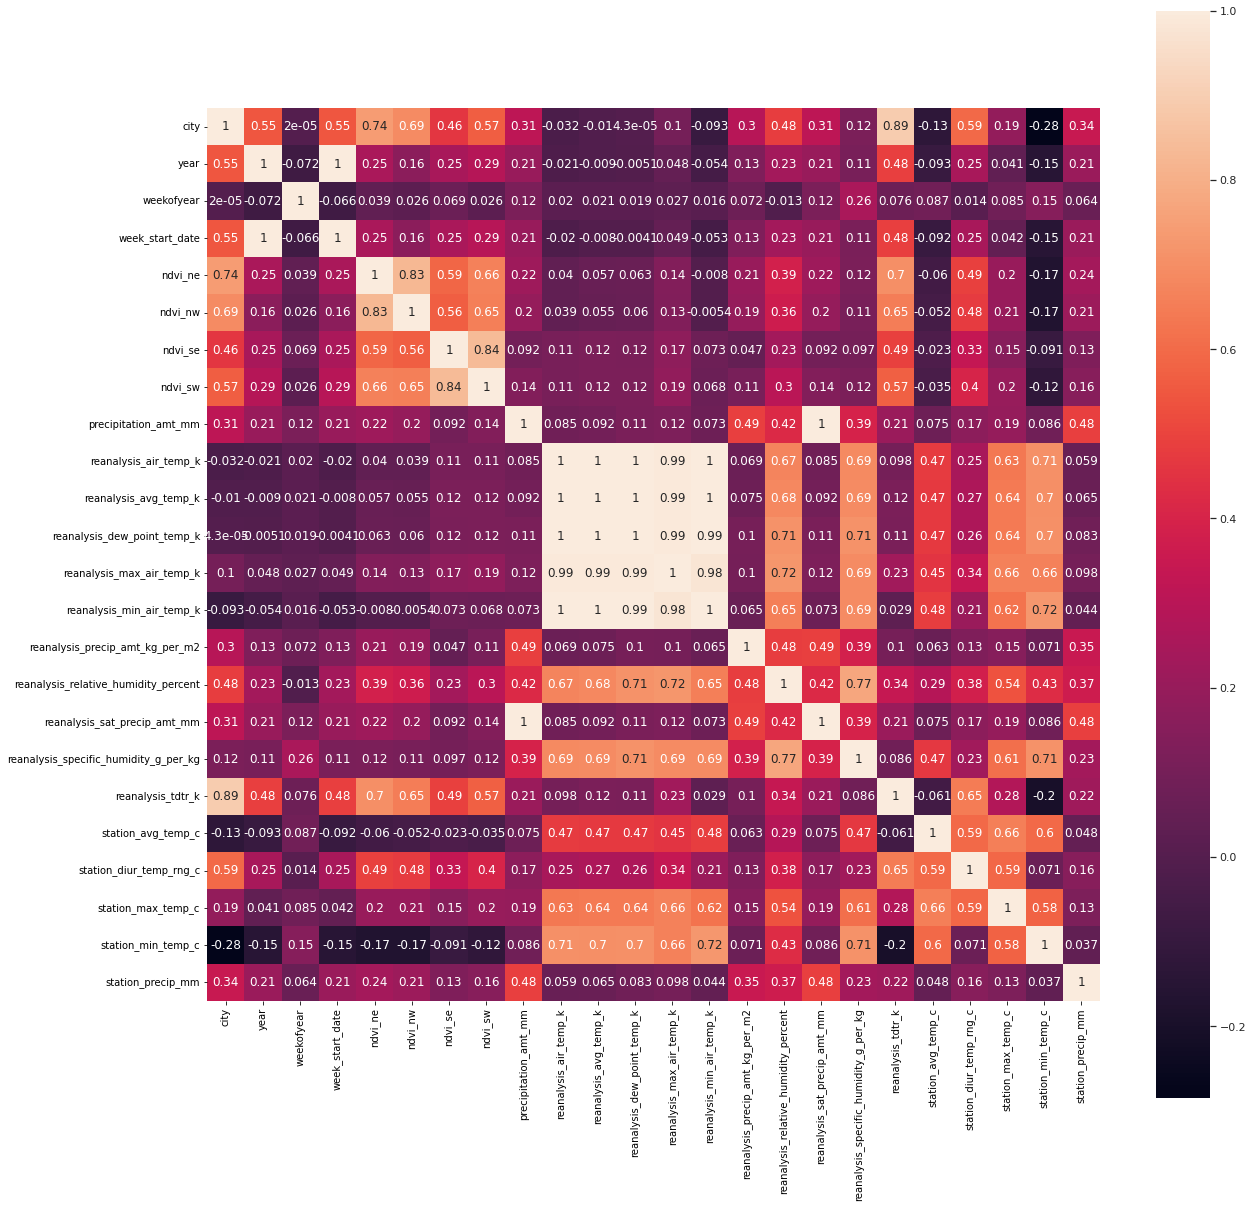

In [8]:
fig,ax = plt.subplots(figsize=(20,20))
sns.set()
sns.heatmap(x_train.corr(), square=True, annot=True)
plt.show()

Vemos claramente que hay relación entre muchas variables, aunque el día del comienzo de la semana es la que menos relación tiene con las demás, luego podemos eliminarla para obtener así un mejor entrenamiento y una mejor predicción junto además la variable preicipitation_amt_mm ya que tiene los mismos valores que reanalysis_sat_precip_amt_mm.

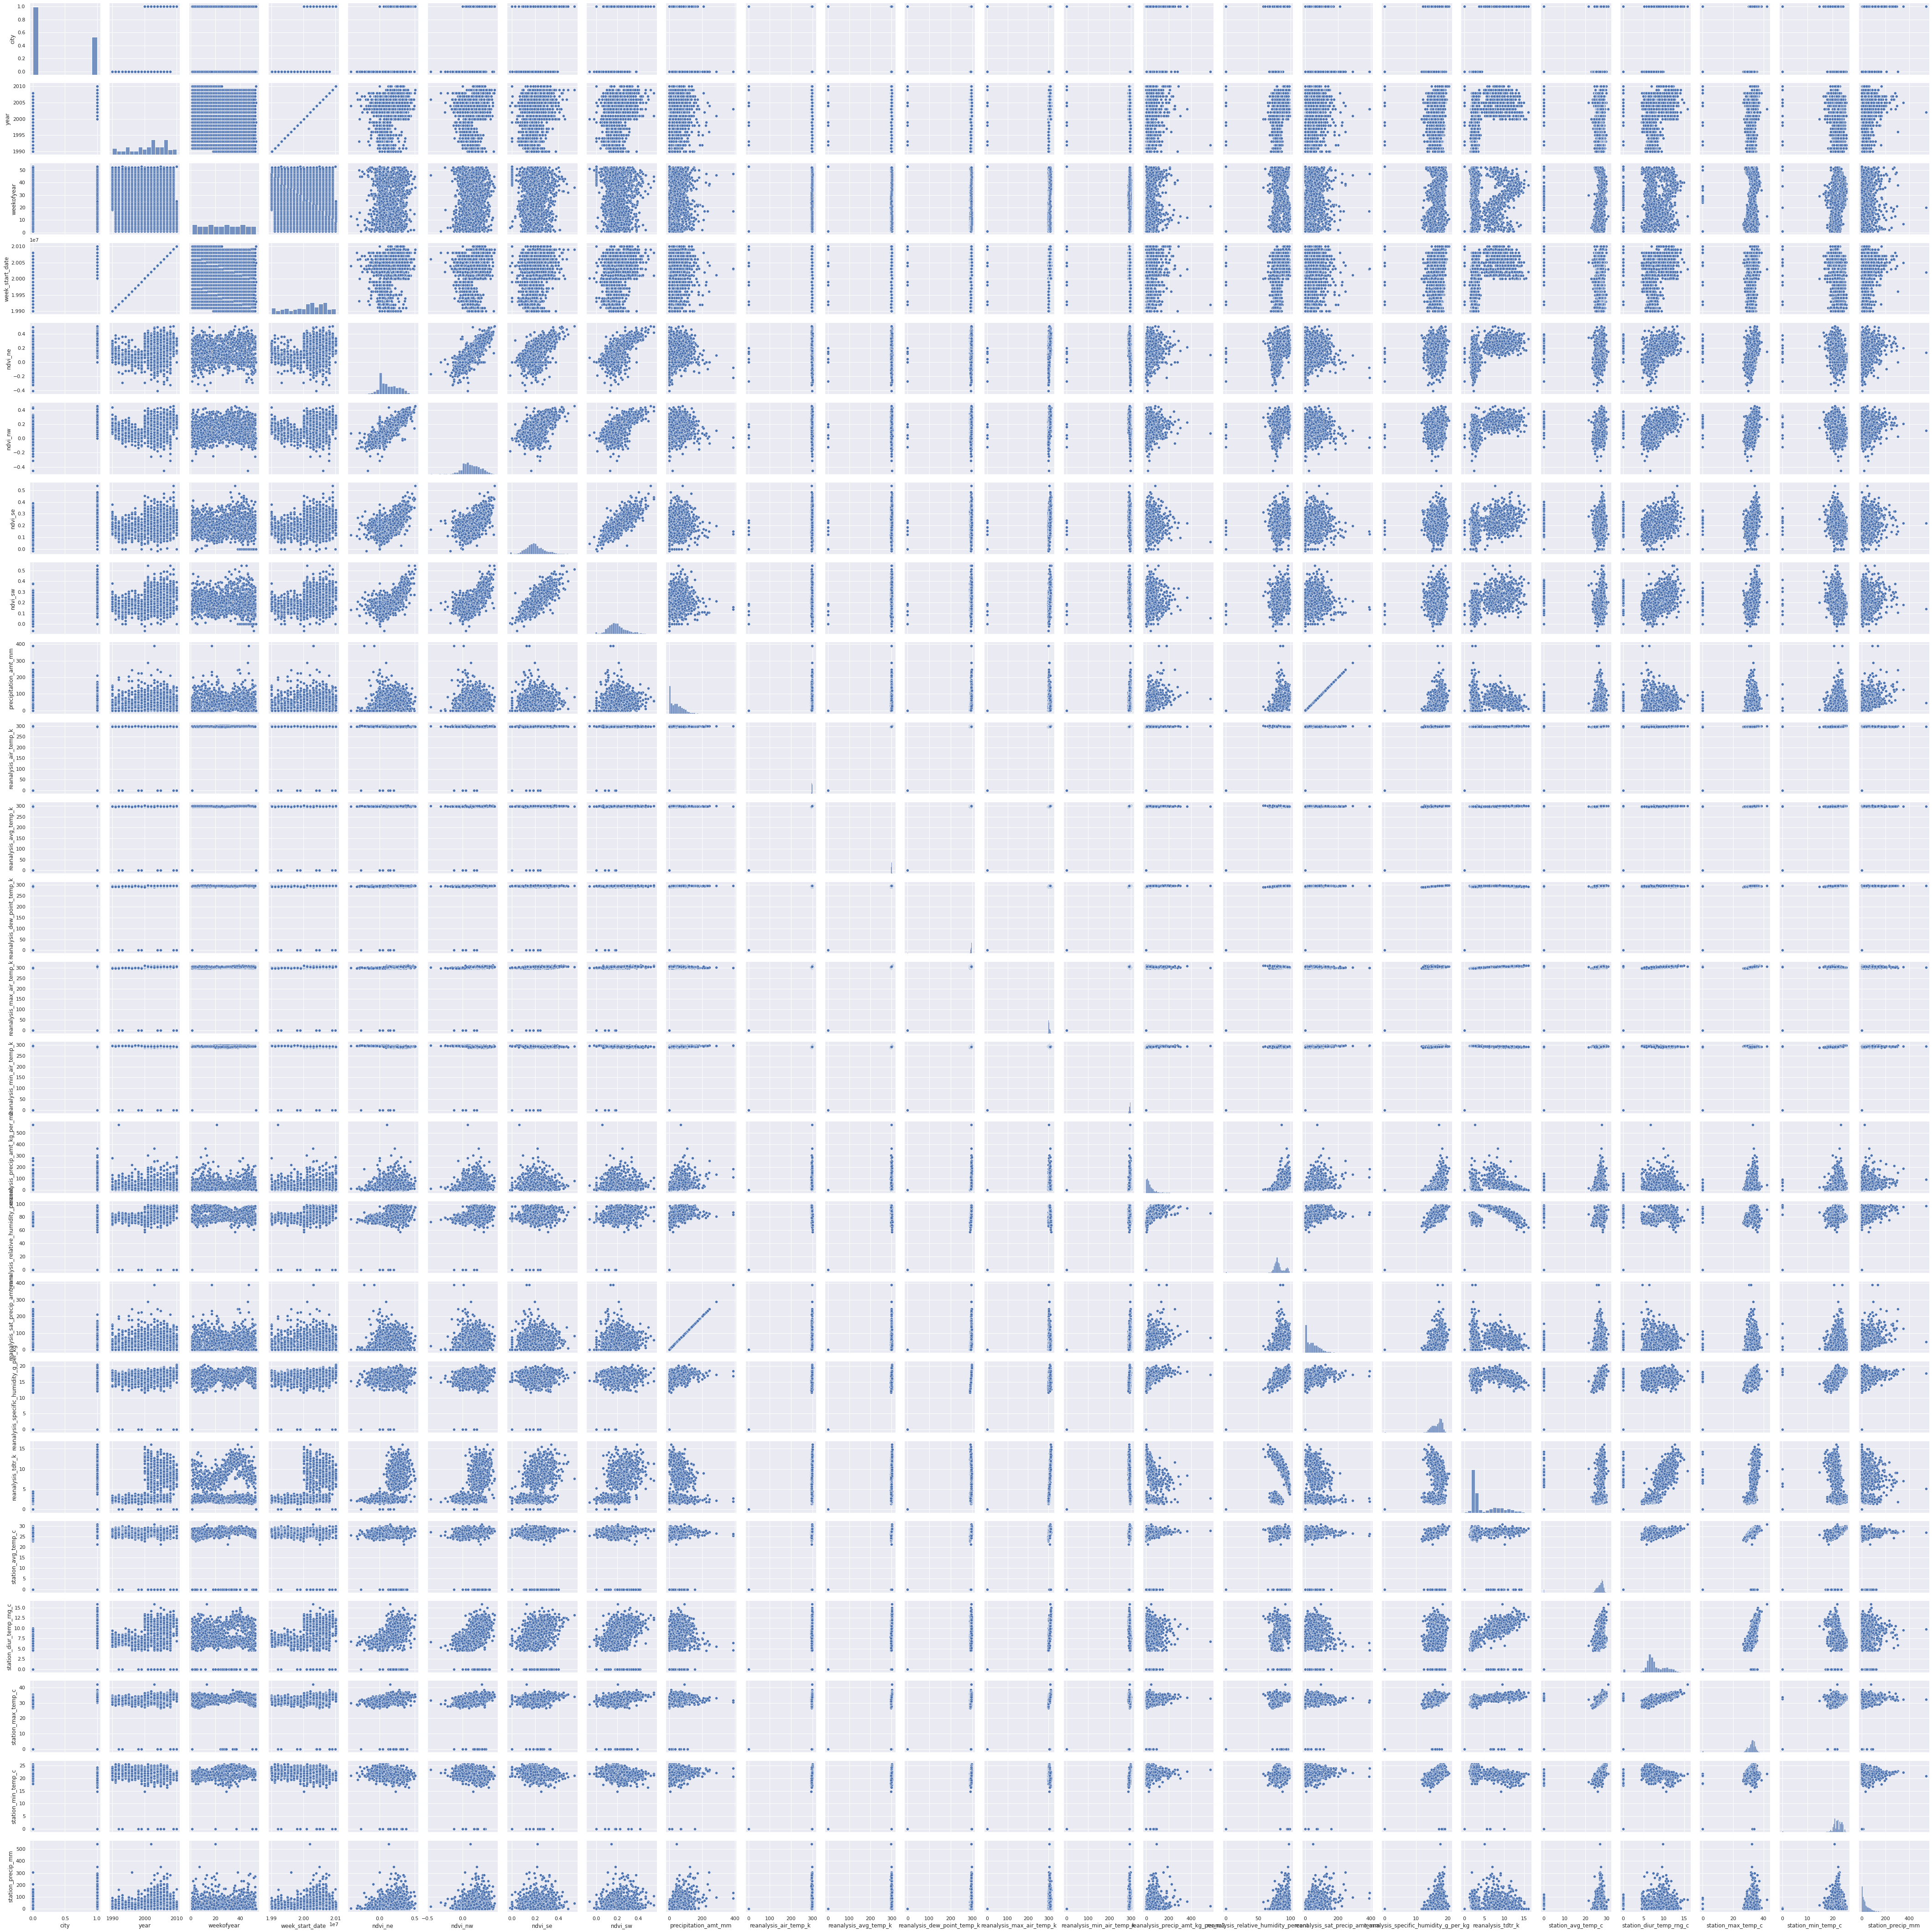

In [9]:
sns.pairplot(x_train)

# Borrado de datos y esccalamiento de los mismos.


Debido a la conclusión anteriormente dicha, eliminaremos la columna **'week_start_date'** por la poca correlación que se puede observar en la matriz de correlación y además **precipitation_amt_mm** que tiene los mismos valores que otra columna llamanda **reanalysis_sat_precip_amt_mm**.

In [10]:
x_train = x_train.drop(['week_start_date','precipitation_amt_mm'],axis=1)
X_test = X_test.drop(['week_start_date','precipitation_amt_mm'],axis=1)
x_train

city  year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0        0  1990          18  0.122600  0.103725  0.198483  0.177617   
1        0  1990          19  0.169900  0.142175  0.162357  0.155486   
2        0  1990          20  0.032250  0.172967  0.157200  0.170843   
3        0  1990          21  0.128633  0.245067  0.227557  0.235886   
4        0  1990          22  0.196200  0.262200  0.251200  0.247340   
...    ...   ...         ...       ...       ...       ...       ...   
1451     1  2010          21  0.342750  0.318900  0.256343  0.292514   
1452     1  2010          22  0.160157  0.160371  0.136043  0.225657   
1453     1  2010          23  0.247057  0.146057  0.250357  0.233714   
1454     1  2010          24  0.333914  0.245771  0.278886  0.325486   
1455     1  2010          25  0.298186  0.232971  0.274214  0.315757   

      reanalysis_air_temp_k  reanalysis_avg_temp_k  \
0                297.572857             297.742857   
1                298.211429             298.442857   
2                298.781429             298.878571   
3                298.987143             299.228571   
4                299.518571             299.664286   
...                     ...                    ...   
1451             299.334286             300.771429   
1452             298.330000             299.392857   
1453             296.598571             297.592857   
1454             296.345714             297.521429   
1455             298.097143             299.835714   

      reanalysis_dew_point_temp_k  ...  reanalysis_precip_amt_kg_per_m2  \
0                      292.414286  ...                            32.00   
1                      293.951429  ...                            17.94   
2                      295.434286  ...                            26.10   
3                      295.310000  ...                            13.90   
4                      295.821429  ...                            12.20   
...                           ...  ...                              ...   
1451                   296.825714  ...                            45.00   
1452                   296.452857  ...                           207.10   
1453                   295.501429  ...                            50.60   
1454                   295.324286  ...                            62.33   
1455                   295.807143  ...                            36.90   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                                73.365714                         12.42   
1                                77.368571                         22.82   
2                                82.052857                         34.54   
3                                80.337143                         15.36   
4                                80.460000                          7.52   
...                                    ...                           ...   
1451                             88.765714                         55.30   
1452                             91.600000                         86.47   
1453                             94.280000                         58.94   
1454                             94.660000                         59.67   
1455                             89.082857                         63.22   

      reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                                 14.012857           2.628571   
1                                 15.372857           2.371429   
2                                 16.848571           2.300000   
3                                 16.672857           2.428571   
4                                 17.210000           3.014286   
...                                     ...                ...   
1451                              18.485714           9.800000   
1452                              18.070000           7.471429   
1453                              17.008571           7.500000   
1454              

En la siguiente celda pasamos a escalar los datos de distintas maneras, solo el mejor escalamiento esta descomentado.
Los demás son buenos, hacen que el MAE se reduzca pero el mejor es el MaxAbsScaler el cuál se encarga de escalar y desplazar cada característica individualmente de forma que el valor máximo absoluto en todas ellas sea 1 o cerca de él.

In [11]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler


"""scaler =MinMaxScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train)
X_test[X_test.columns] = scaler.fit_transform(X_test)
x_train"""

"""scaler =StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train)
X_test[X_test.columns] = scaler.fit_transform(X_test)
x_train"""

scaler =MaxAbsScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train)
X_test[X_test.columns] = scaler.fit_transform(X_test)
x_train

city     year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0      0.0  0.99005    0.339623  0.241169  0.227417  0.368713  0.325295   
1      0.0  0.99005    0.358491  0.334214  0.311719  0.301603  0.284764   
2      0.0  0.99005    0.377358  0.063440  0.379230  0.292023  0.312890   
3      0.0  0.99005    0.396226  0.253037  0.537309  0.422722  0.432012   
4      0.0  0.99005    0.415094  0.385949  0.574874  0.466642  0.452990   
...    ...      ...         ...       ...       ...       ...       ...   
1451   1.0  1.00000    0.396226  0.674231  0.699189  0.476196  0.535724   
1452   1.0  1.00000    0.415094  0.315048  0.351615  0.252720  0.413279   
1453   1.0  1.00000    0.433962  0.485991  0.320230  0.465076  0.428035   
1454   1.0  1.00000    0.452830  0.656850  0.538854  0.518072  0.596109   
1455   1.0  1.00000    0.471698  0.586567  0.510790  0.509394  0.578292   

      reanalysis_air_temp_k  reanalysis_avg_temp_k  \
0                  0.984688               0.982881   
1                  0.986802               0.985192   
2                  0.988688               0.986631   
3                  0.989368               0.987786   
4                  0.991127               0.989224   
...                     ...                    ...   
1451               0.990517               0.992879   
1452               0.987194               0.988328   
1453               0.981464               0.982386   
1454               0.980628               0.982150   
1455               0.986423               0.989790   

      reanalysis_dew_point_temp_k  ...  reanalysis_precip_amt_kg_per_m2  \
0                        0.979776  ...                         0.056091   
1                        0.984927  ...                         0.031446   
2                        0.989895  ...                         0.045749   
3                        0.989479  ...                         0.024365   
4                        0.991193  ...                         0.021385   
...                           ...  ...                              ...   
1451                     0.994558  ...                         0.078878   
1452                     0.993308  ...                         0.363015   
1453                     0.990120  ...                         0.088694   
1454                     0.989527  ...                         0.109255   
1455                     0.991145  ...                         0.064680   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                                 0.743999                      0.031797   
1                                 0.784592                      0.058423   
2                                 0.832095                      0.088428   
3                                 0.814696                      0.039324   
4                                 0.815942                      0.019252   
...                                    ...                           ...   
1451                              0.900169                      0.141577   
1452                              0.928912                      0.221377   
1453                              0.956090                      0.150896   
1454                              0.959943                      0.152765   
1455                              0.903386                      0.161854   

      reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                                  0.684843           0.163993   
1                                  0.751309           0.147950   
2                                  0.823431           0.143494   
3                                  0.814843           0.151515   
4                                  0.841095           0.188057   
...                                     ...                ...   
1451                               0.903442           0.611408   
1452                               0.883125           0.466132   
1453                               0.831250     

# Modelo



Actualmente para la separación de datos hacemos un proceso de simulación, es decir, trabajaremos con los datos de x_train y y_train (labels) para en este caso obtener todos los datos [Xtrain,Ytrain,Xtest,Ytest], puesto que no tenemos los datos de Ytest, ya que son los que vamos a predecir teniendo los datos anteriormente dichos y Xtest para hacer dicha predicción.Sin embargo, tenemos que usar Xtest e Ytest de la separación para obtener los vecinos más cercanos y entrenar el modelo.

In [12]:
from sklearn.model_selection import train_test_split
#pasamos datos de entrada y salida, además de eliminar la columna de nombres de coches del csv.

y= y_train['total_cases']

# separamos train y test 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x_train, y, test_size=0.2, random_state=2)

Min Value uniform : 14.625190258751903 (9)
Min Value distance : 14.364730213820527 (12)


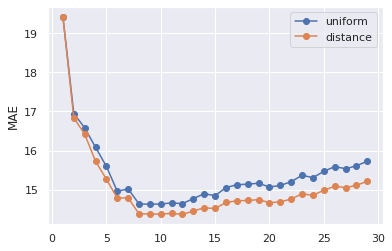

In [13]:
from sklearn import neighbors
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

cv = TimeSeriesSplit(n_splits = 5) #
Xtrain.reset_index(drop = True, inplace = True) # reinicia índice, necesario tras borrar una columna

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(Xtrain):
          # División train test aleatoria
          f_train = Xtrain.loc[train_fold]
          f_test = Xtrain.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit(Xtrain,Ytrain)
          y_pred_cv = knn.predict(Xtest)
          # evaluación del modelo
          mae = mean_absolute_error(Ytest, y_pred_cv)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')     

plt.legend()
plt.show() 

In [14]:
# 1. elegir regresor
from sklearn.neighbors import KNeighborsRegressor # Se utiliza este método porque es un problema de clasificación
#Parámetros
k = 12 # Kneighbours o vecinos
w = "distance" # elijo uniform porque al recorrer lo vecinos más cercano devuelve mayor precisión

# 2. instanciar el modelo
knn_model = KNeighborsRegressor(k, weights=w)
# 3. entrenamiento con los datos
knn_model.fit(Xtrain , Ytrain)
# 4. crear solo predicción
y_pred = knn_model.predict(X_test)

array([  7.32839369,  11.59013138,  12.09383829,  12.7193598 ,
        25.95648281,  20.4995834 ,  47.21283411,  25.01552051,
        30.08150638,  70.49414948,  32.84396563,  20.87096671,
        17.32222442,  51.15275761,  39.12811337,  90.41373497,
        44.37911384,  58.38399624,  35.86170611,  23.06333347,
        38.25447799,  44.49398617,  42.22010651,  39.7433833 ,
        57.09162087,  46.63916214,  52.30620992,  39.96187237,
        41.08979324,  43.06135501,  46.97591346,  35.57860696,
        35.13340152,  36.51569543,  23.89125578,  30.3008417 ,
        12.68034168,  23.04939662,  17.23609246,  18.18237835,
        14.83518446,  16.03783092,  20.39138798,  15.00717548,
        13.80877144,  15.95042555,  15.59102833,   7.3785343 ,
        23.13278446,   8.12712122,  10.49750727,  11.16521391,
        18.33227007,  11.35476341,  21.88148866,  11.17726216,
        15.16898966,  21.03991638,  27.80912654,  49.41943864,
        22.60449397,  28.29529167,  49.6767197 ,  73.99

# Carga del fichero, reemplazo de valores de la columna de casos y descarga del mismo

1. Cargamos el csv que nos han proporcionado, luego reemplazamos los valores por la predicción obtenida como se puede ver en el siguiente dataframe.

In [15]:
results = pd.read_csv('https://raw.githubusercontent.com/alexander6779/SNS/main/challenge_dengue/submission_format.csv')
results['total_cases'] = y_pred.astype('int')
results

city  year  weekofyear  total_cases
0     sj  2008          18            7
1     sj  2008          19           11
2     sj  2008          20           12
3     sj  2008          21           12
4     sj  2008          22           25
..   ...   ...         ...          ...
411   iq  2013          22            3
412   iq  2013          23            3
413   iq  2013          24            5
414   iq  2013          25            3
415   iq  2013          26            2

[416 rows x 4 columns]

2. Descargamos el csv.

Importante: se descargar en los archivos del colab en la carpeta de content, luego ahí lo descargas en tu ordenador.

In [16]:
results.to_csv("results_cases_dengue.csv", index=False) 